In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure.format = 'svg'

In [2]:
learning_rate = 0.01
epochs = 200

In [5]:
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3*train_x + 4*np.random.randn(n_samples)

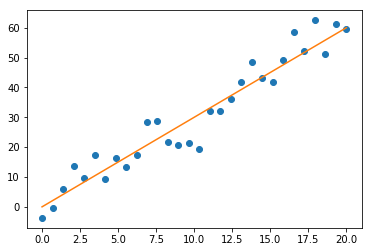

In [7]:
plt.plot(train_x,train_y,'o')
plt.plot(train_x, 3* train_x)
plt.show()

# Create variables for X,Y,W,B

In [9]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(),name = 'weights')
B = tf.Variable(np.random.randn(),name = 'bias')

Instructions for updating:
Colocations handled automatically by placer.


# Define a graph

In [25]:
pred = X*W + B     #pred = tf.add(tf.multiply(X, W), B)   both ways also work

cost = tf.reduce_sum((pred - Y) ** 2 )/ (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


# Initialize all parameters and variables

In [27]:
init = tf.global_variables_initializer()

epoch:  000 c=33.3756 w= 2.3918 b = 1.3127
epoch:  020 c=12.9782 w= 2.9777 b = 1.2757
epoch:  040 c=12.9414 w= 2.9830 b = 1.1940
epoch:  060 c=12.9082 w= 2.9880 b = 1.1164
epoch:  080 c=12.8783 w= 2.9927 b = 1.0427
epoch:  100 c=12.8512 w= 2.9972 b = 0.9728
epoch:  120 c=12.8268 w= 3.0015 b = 0.9065
epoch:  140 c=12.8047 w= 3.0055 b = 0.8435
epoch:  160 c=12.7848 w= 3.0094 b = 0.7837
epoch:  180 c=12.7667 w= 3.0130 b = 0.7270


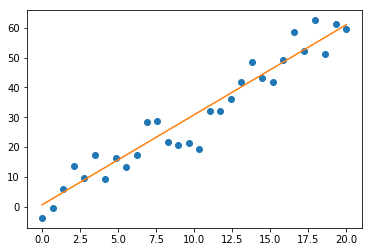

In [31]:
#loop over x and y data inside for loop
#run optimizer and fit the data, optimize W and minimize Cost
# for every 20 epoch, print statement to check the cost and bias
# Run the final weight and bias

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sess.run(optimizer,feed_dict = {X: x, Y:y})
        
        if not epoch % 20:
            c = sess.run(cost, feed_dict = {X: train_x, Y: train_y})
            w = sess.run(W)
            b = sess.run(B)
            print(f'epoch: {epoch: 04d} c={c:.4f} w={w: .4f} b = {b:.4f}')
    
    weight = sess.run(W)
    bias = sess.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x,weight * train_x + bias)
    plt.show()